# Machine Learning
## Trabalho 3
### Igor Thales dos Santos
#### Resampling

### Ex 5A

In [5]:
install.packages("ISLR")

In [6]:
library(ISLR)
summary(Default)
attach(Default)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)


 default    student       balance           income     
 No :9667   No :7056   Min.   :   0.0   Min.   :  772  
 Yes: 333   Yes:2944   1st Qu.: 481.7   1st Qu.:21340  
                       Median : 823.6   Median :34553  
                       Mean   : 835.4   Mean   :33517  
                       3rd Qu.:1166.3   3rd Qu.:43808  
                       Max.   :2654.3   Max.   :73554  

The following objects are masked from Default (pos = 3):

    balance, default, income, student



In [7]:
set.seed(1)
glm.fit = glm(default ~ income + balance, data = Default, family = binomial)

#  Ex 5B

In [71]:
ex5b = function() {

    train = sample(dim(Default)[1], dim(Default)[1]/2)

    glm.fit = glm(default ~ income + balance, data = Default, family = binomial, 
        subset = train)

    glm.pred = rep("No", dim(Default)[1]/2)
    glm.probs = predict(glm.fit, Default[-train, ], type = "response")
    glm.pred[glm.probs > 0.5] = "Yes"

    return(mean(glm.pred != Default[-train, ]$default))
}
ex5b()

[1] 0.0282

In [56]:
## 2.82% teste de erro

# Ex 5C

In [58]:
ex5b()

[1] 0.026

In [59]:
ex5b()

[1] 0.0262

In [60]:
ex5b()

[1] 0.0254

In [61]:
## Aparenta ter aproximadamente 2.6% de teste de taxa de erro.

# Ex 5D

In [12]:
train = sample(dim(Default)[1], dim(Default)[1]/2)
glm.fit = glm(default ~ income + balance + student, data = Default, family = binomial, 
    subset = train)
glm.pred = rep("No", dim(Default)[1]/2)
glm.probs = predict(glm.fit, Default[-train, ], type = "response")
glm.pred[glm.probs > 0.5] = "Yes"
mean(glm.pred != Default[-train, ]$default)

[1] 0.0264

In [62]:
## 2.64% teste de taxa de erro com variável dummy em student

# Ex 6A

In [13]:
set.seed(1)
glm.fit = glm(default ~ income + balance, data = Default, family = binomial)
summary(glm.fit)


Call:
glm(formula = default ~ income + balance, family = binomial, 
    data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4725  -0.1444  -0.0574  -0.0211   3.7245  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.154e+01  4.348e-01 -26.545  < 2e-16 ***
income       2.081e-05  4.985e-06   4.174 2.99e-05 ***
balance      5.647e-03  2.274e-04  24.836  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1579.0  on 9997  degrees of freedom
AIC: 1585

Number of Fisher Scoring iterations: 8


# Ex 6B

In [14]:
boot.fn = function(data, index) return(coef(glm(default ~ income + balance, 
    data = data, family = binomial, subset = index)))

# Ex 6C

In [15]:
library(boot)
boot(Default, boot.fn, 50)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Default, statistic = boot.fn, R = 50)


Bootstrap Statistics :
         original        bias     std. error
t1* -1.154047e+01  1.181200e-01 4.202402e-01
t2*  2.080898e-05 -5.466926e-08 4.542214e-06
t3*  5.647103e-03 -6.974834e-05 2.282819e-04

# Ex 6D

In [63]:
## Respostas parecidas no segundo e no terceiro digitos.

# Ex 8A

In [24]:
set.seed(1)
y = rnorm(100)
x = rnorm(100)
y = x - 2 * x^2 + rnorm(100)

# Ex 8B

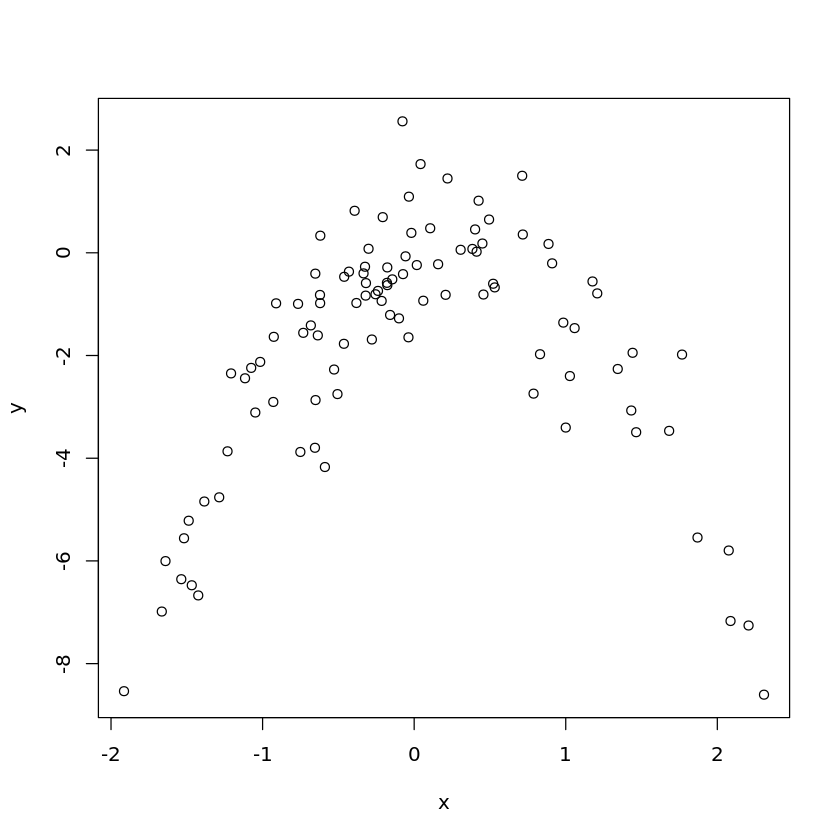

In [25]:
plot(x, y)

In [64]:
## Plot quadrático, aonde x varia de -2 a 2 e Y de -8 a 2

# Ex 8C

In [66]:
library(boot)
Data = data.frame(x, y)
set.seed(1)

glm.fit = glm(y ~ x)
cv.glm(Data, glm.fit)$delta

[1] 5.890979 5.888812

In [65]:
glm.fit = glm(y ~ poly(x, 2))
cv.glm(Data, glm.fit)$delta

[1] 1.086596 1.086326

In [67]:
glm.fit = glm(y ~ poly(x, 3))
cv.glm(Data, glm.fit)$delta

[1] 1.102585 1.102227

In [68]:
glm.fit = glm(y ~ poly(x, 4))
cv.glm(Data, glm.fit)$delta

[1] 1.114772 1.114334

# Ex 8D

In [30]:
set.seed(10)

glm.fit = glm(y ~ x)
cv.glm(Data, glm.fit)$delta

[1] 5.890979 5.888812

In [31]:
glm.fit = glm(y ~ poly(x, 2))
cv.glm(Data, glm.fit)$delta

[1] 1.086596 1.086326

In [32]:
glm.fit = glm(y ~ poly(x, 3))
cv.glm(Data, glm.fit)$delta

[1] 1.102585 1.102227

In [33]:
glm.fit = glm(y ~ poly(x, 4))
cv.glm(Data, glm.fit)$delta

[1] 1.114772 1.114334

In [ ]:
## Exatamente igual, porque LOOCV vai ser sempre igual enquanto avaliar n tipos de uma observação

#  Ex 8E

In [72]:
## A polinomial quadrádica tem o menor teste de erro LOOCV. 

# Ex 8F

In [35]:
summary(glm.fit)


Call:
glm(formula = y ~ poly(x, 4))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8914  -0.5244   0.0749   0.5932   2.7796  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.8277     0.1041 -17.549   <2e-16 ***
poly(x, 4)1   2.3164     1.0415   2.224   0.0285 *  
poly(x, 4)2 -21.0586     1.0415 -20.220   <2e-16 ***
poly(x, 4)3  -0.3048     1.0415  -0.293   0.7704    
poly(x, 4)4  -0.4926     1.0415  -0.473   0.6373    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 1.084654)

    Null deviance: 552.21  on 99  degrees of freedom
Residual deviance: 103.04  on 95  degrees of freedom
AIC: 298.78

Number of Fisher Scoring iterations: 2


In [73]:
## p-valor mostra sifnificancia estatística linear e quadratica dos termos, que concorda com os resultados CV

# Ex 9A

In [37]:
library(MASS)
summary(Boston)
set.seed(1)
attach(Boston)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

In [38]:
medv.mean = mean(medv)
medv.mean

[1] 22.53281

#  EX 9B

In [39]:
medv.err = sd(medv)/sqrt(length(medv))
medv.err

[1] 0.4088611

# Ex 9C

In [40]:
boot.fn = function(data, index) return(mean(data[index]))
library(boot)
bstrap = boot(medv, boot.fn, 1000)
bstrap


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = medv, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
    original      bias    std. error
t1* 22.53281 0.008517589   0.4119374

In [74]:
## Dois digitos similares (0.4119 e 0.4089)

# Ex 9D

In [41]:
t.test(medv)


	One Sample t-test

data:  medv
t = 55.111, df = 505, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 21.72953 23.33608
sample estimates:
mean of x 
 22.53281 


In [42]:
c(bstrap$t0 - 2 * 0.4119, bstrap$t0 + 2 * 0.4119)

[1] 21.70901 23.35661

In [75]:
## Bootstrap estima apenas 0.02 para longe da estimativa t.test 

# Ex 9E

In [43]:
medv.med = median(medv)
medv.med

[1] 21.2

# Ex 9F

In [44]:
boot.fn = function(data, index) return(median(data[index]))
boot(medv, boot.fn, 1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = medv, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
    original  bias    std. error
t1*     21.2 -0.0098   0.3874004

In [76]:
## Mediana de 21.2 com SE de 0.380. 

# Ex 9G


In [45]:
medv.tenth = quantile(medv, c(0.1))
medv.tenth

10% 
12.75

# Ex 9H

In [46]:
boot.fn = function(data, index) return(quantile(data[index], c(0.1)))
boot(medv, boot.fn, 1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = medv, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
    original  bias    std. error
t1*    12.75 0.00515   0.5113487

In [77]:
## décimo percentual de 12.75 com SE de 0.511. 